Ceyhan Sahinkaya Akyol

**Supervised EDA and First Pass**

Data: Underground Storage Tank (UST) system and Aboveground Storage Tank (AST) system
petroleum release events, with their associated locations, contacts for remediation, and
status in relation to currently being investigated, assessed, remediated, obtaining
closure, or closed, dating back to 1986. Data provided by the State of Colorado,
Department of Labor & Employment, Division of Oil & Public Safety


In [42]:
import gdown
import pandas as pd

# Google Drive file ID (Extracted from your link)
file_id = "1GzBgoaDZfHwNoy4gTA35B4p9U5wiURef"

# Construct the download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file (CSV format)
output_path = "my_data.csv"  # Change to .csv since your file is in CSV format
gdown.download(url, output_path, quiet=False)

# Load the CSV file into a DataFrame
df = pd.read_csv(output_path)  # Change from pd.read_excel() to pd.read_csv()

# Display basic information about the dataset
df_shape = df.shape
df_description = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

# Convert "Release Date" and "Closure Date" to datetime (if they exist)
if "Release Date" in df.columns:
    df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

if "Closure_Date" in df.columns:
    df["Closure_Date"] = pd.to_datetime(df["Closure_Date"], errors="coerce")

# Extract numerical columns for analysis
numerical_cols = df.select_dtypes(include=["number"]).columns

# Print results
print("Dataset Shape:", df_shape)
print("\nDataset Description:\n", df_description)
print("\nMissing Values:\n", missing_values)
print("\nNumerical Columns:\n", numerical_cols)


Downloading...
From: https://drive.google.com/uc?id=1GzBgoaDZfHwNoy4gTA35B4p9U5wiURef
To: /content/my_data.csv
100%|██████████| 4.16M/4.16M [00:00<00:00, 182MB/s]


Dataset Shape: (13635, 23)

Dataset Description:
            Event ID   Facility ID           Zip      Latitude     Longitude
count  13635.000000  13635.000000  13635.000000  13271.000000  13271.000000
mean    7690.435937   8633.273487  80594.330106     39.485497   -105.315480
std     4741.664598   5267.336502    493.700318      0.766127      1.196718
min        2.000000      8.000000  80002.000000     37.008913   -109.044675
25%     3612.500000   4107.000000  80210.000000     39.077870   -105.219029
50%     7362.000000   8800.000000  80482.000000     39.711522   -104.997515
75%    11504.500000  12452.500000  80917.000000     39.842808   -104.829919
max    17830.000000  21230.000000  81658.000000     40.993637   -102.051765

Missing Values:
 Release Number               0
Release Record Type          0
Event ID                     0
Facility ID                  0
Site Name                    0
Address                      0
City                         0
Zip                          0


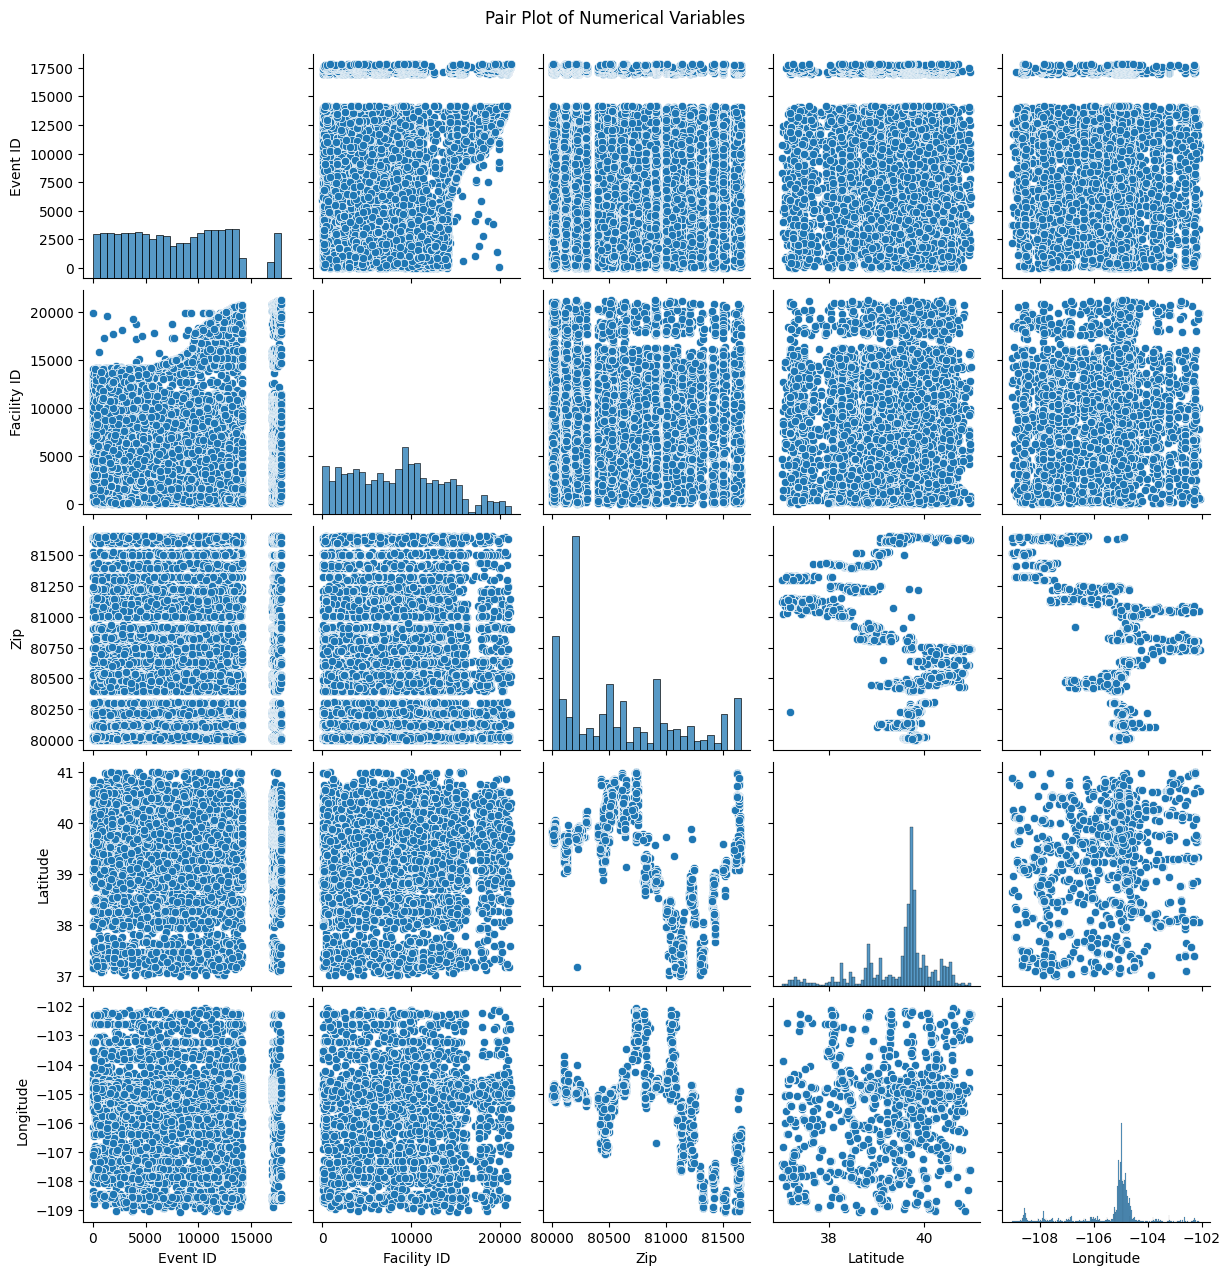

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numerical columns
sns.pairplot(df[numerical_cols].dropna())
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

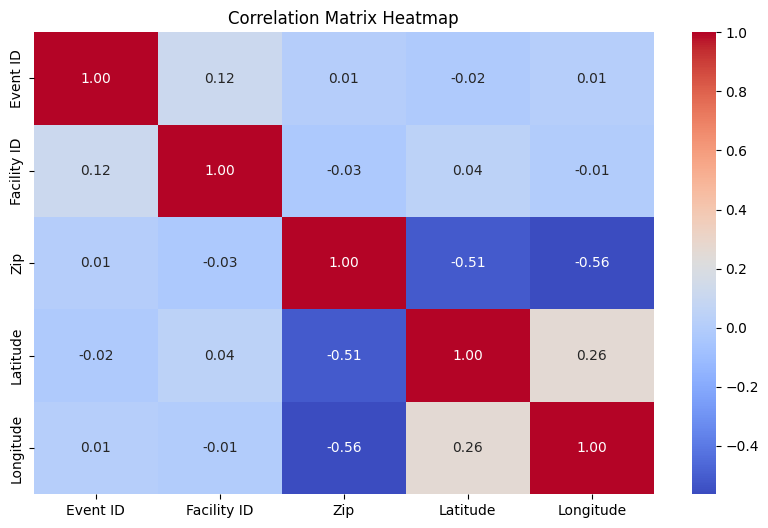

In [44]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

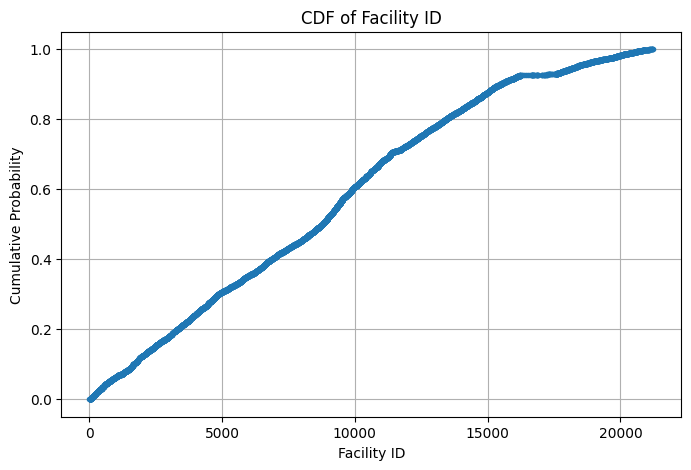

In [45]:
import numpy as np
# CDF for a numerical column (e.g., Facility ID)
plt.figure(figsize=(8, 5))
sorted_data = np.sort(df["Facility ID"].dropna())
yvals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, yvals, marker=".", linestyle="none")
plt.xlabel("Facility ID")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Facility ID")
plt.grid()
plt.show()

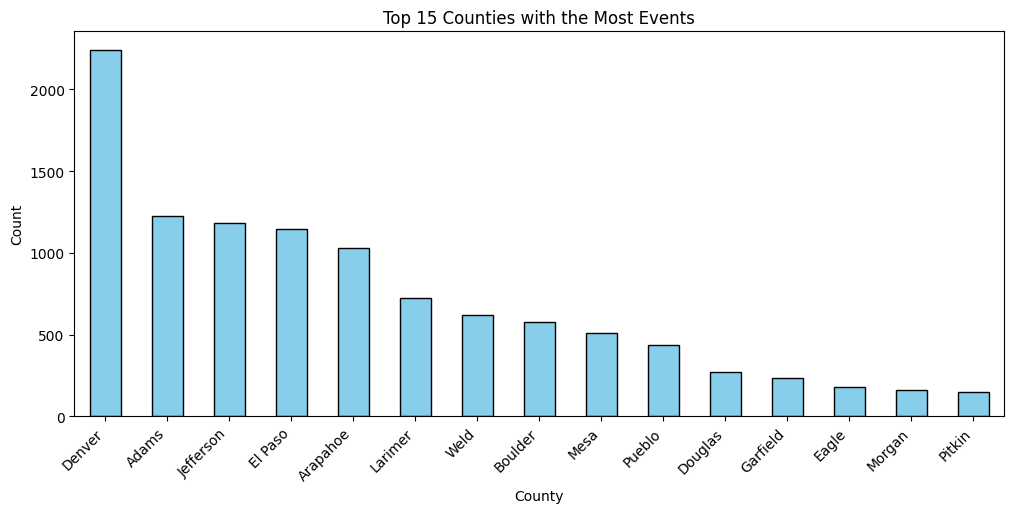

In [46]:
# Plot the number of events by county
plt.figure(figsize=(12, 5))
df["County"].value_counts().head(15).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 15 Counties with the Most Events")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [47]:

from IPython.display import display

# Assuming df is already loaded
df_shape = df.shape  # Get dataset shape
df_description = df.describe()  # Get statistical summary
missing_values = df.isnull().sum()  # Count missing values in each column

# Create a structured dataset summary table
dataset_summary = pd.DataFrame({
    "Metric": ["Number of Rows", "Number of Columns"],
    "Value": [df_shape[0], df_shape[1]]
})

# Transpose describe table for better readability
description_summary = df_description.transpose()

# Create a structured missing values table
missing_values_summary = pd.DataFrame({
    "Column Name": missing_values.index,
    "Missing Values": missing_values.values,
    "Percentage Missing": (missing_values.values / df.shape[0]) * 100
}).sort_values(by="Missing Values", ascending=False)

# Display the structured dataset summary
display(dataset_summary)

# Display the detailed statistical description
display(description_summary)

# Display missing values summary in a clear table format
display(missing_values_summary)


,Metric,Value
0,Number of Rows,13635
1,Number of Columns,23


,count,mean,min,25%,50%,75%,max,std
Event ID,13635.0,7690.435937,2.0,3612.5,7362.0,11504.5,17830.0,4741.664598
Facility ID,13635.0,8633.273487,8.0,4107.0,8800.0,12452.5,21230.0,5267.336502
Zip,13635.0,80594.330106,80002.0,80210.0,80482.0,80917.0,81658.0,493.700318
Release Date,10817,2003-02-27 23:12:44.463344768,1981-08-19 00:00:00,1993-04-30 00:00:00,1999-09-21 00:00:00,2012-05-23 00:00:00,2024-12-30 00:00:00,NaN
Closure_Date,11797,2005-01-20 05:43:58.738662272,1876-01-01 00:00:00,1996-12-11 00:00:00,2002-05-20 00:00:00,2014-04-28 00:00:00,2025-01-02 00:00:00,NaN
Latitude,13271.0,39.485497,37.008913,39.07787,39.711522,39.842808,40.993637,0.766127
Longitude,13271.0,-105.31548,-109.044675,-105.219029,-104.997515,-104.829919,-102.051765,1.196718


,Column Name,Missing Values,Percentage Missing
21,Release Cause,9687,71.045105
20,Release Source,9180,67.326733
11,Release Date,2818,20.667400
12,Closure_Date,1838,13.480015
13,No Further Action Type,559,4.099743
18,Longitude,364,2.669600
17,Latitude,364,2.669600
14,Contact,1,0.007334
19,"Latitude, Longitude",0,0.000000
16,Email,0,0.000000


**Key Findings:**

Missing Values: Some columns contain missing data, particularly Release Source and Release Cause.

Numerical Data Relationships:
Pair plots for numerical variables suggest possible relationships.
Correlation heatmap indicates weak correlation between most numerical variables.

Temporal Trends:
CDF of Facility ID shows cumulative distribution over different facility IDs.

Geographical Insights:
Top 15 counties with the most petroleum release events highlight areas of concern.

The dataset **is not considered big data **(manageable number of records and attributes).

The dataset can help** answer questions** about:

* Spatial distribution of petroleum release events.

* Temporal trends in incidents.

* Possible relationships between event occurrences and facility locations

______________________

***FIRST PASS***


**Define the Target Variable for Classification**

* One possible target could be “Status” (e.g., active/inactive release cases).
* Alternatively, "Release Cause" could be predicted (if missing values are handled).

**Feature Selection & Data Cleaning**

* Convert Release Date and Closure Date into datetime format.
* Drop non-relevant columns like Release Number, Address, Contact Info.
* Handle missing values properly.

In [48]:
import google.colab.data_table

df = pd.read_csv(output_path)

# Drop irrelevant columns
df_cleaned = df.drop(columns=["Release Number", "Event ID", "Facility ID", "Address",
                              "Phone", "Email", "Release Record Link", "Latitude, Longitude"])

# Drop rows where the target variable "Release Cause" is missing
df_cleaned = df_cleaned.dropna(subset=["Release Cause"])

# Fill missing values in categorical columns with "Unknown"
categorical_columns = ["Release Record Type", "Status", "No Further Action Type", "Release Source"]
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].fillna("Unknown")

# Convert categorical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns + ["Release Cause", "County", "State"]:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Fill missing numeric values with median
df_cleaned["Latitude"].fillna(df_cleaned["Latitude"].median(), inplace=True)
df_cleaned["Longitude"].fillna(df_cleaned["Longitude"].median(), inplace=True)

# Drop any remaining missing values
df_cleaned = df_cleaned.dropna()

google.colab.data_table.enable_dataframe_formatter()
df_cleaned


<ipython-input-48-e9f1a7497283>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Latitude"].fillna(df_cleaned["Latitude"].median(), inplace=True)
<ipython-input-48-e9f1a7497283>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,Release Record Type,Site Name,City,Zip,State,County,Status,Release Date,Closure_Date,No Further Action Type,Contact,Latitude,Longitude,Release Source,Release Cause
6,0,203 Vallejo Street LLC,Denver,80223,0,16,3,1/8/2019,3/18/2019,4,Julia Fraser,39.720431,-105.013440,46,4
7,0,2045 Corporation,Englewood,80110,0,2,3,10/9/2019,4/24/2020,4,Mary KV White,39.633601,-105.013644,46,4
8,0,Floyd's 99 Barbershop,Fort Collins,80525,0,35,3,11/30/2009,12/11/2009,4,Jennifer Steffes,40.559806,-105.077500,46,4
21,0,7-Eleven #13154,Commerce City,80022,0,0,3,10/16/2007,5/22/2008,5,Bobby Sonnier,39.827564,-104.903619,40,1
24,0,7-Eleven #13171,Fort Collins,80521,0,35,3,12/6/2010,2/10/2011,4,Tina Sandoval,40.581331,-105.096369,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13580,0,Alta Convenience #6015,Arvada,80004,0,30,3,9/23/2024,10/18/2024,0,Kenneth Rogowski,39.813129,-105.123295,17,6
13581,0,Former Sam's Automotive,Englewood,80110,0,2,3,10/30/2024,12/4/2024,4,April Kelly,39.641042,-105.003530,46,9
13585,0,Sheridan 66,Arvada,80003,0,0,3,9/27/2024,11/14/2024,4,Kyle Campbell,39.813061,-105.052528,25,6
13588,0,Markley Motors Inc,Fort Collins,80525,0,35,3,11/15/2024,12/10/2024,4,April Kelly,40.540706,-105.078638,46,9


**Model Selection & Implementation**

* Logistic Regression (Baseline, interpretable)
* Gradient Boosting Classifier (Handles complex patterns well)
*Support Vector Machine (SVM) (Good for high-dimensional data)

For each model:

Train on the training set.

Evaluate on the test set using accuracy, precision, recall, and F1-score.

Record execution time and lines of code required.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_cleaned.drop(columns=["Release Cause", "Site Name", "City", "Release Date", "Closure_Date", "Contact"])
y = df_cleaned["Release Cause"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display information about the train/test split
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((2212, 9), (554, 9), (2212,), (554,))

The dataset has been successfully split into 2,212 training samples and 554 testing samples with 9 features. Now, I will train and compare the three supervised models: Logistic Regression, Gradient Boosting Classifier, and SVM based on accuracy, execution time, and interpretability

In [50]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="rbf", random_state=42)
}

# Store results
results = {}

# Train and evaluate models
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Training Time (s)": end_time - start_time,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[m]["Accuracy"] for m in results],
    "Training Time (s)": [results[m]["Training Time (s)"] for m in results]
})

# Display results

from IPython.core.display import display, HTML

# Display the headline
display(HTML("<h2>Model Comparison Table</h2>"))

# Display the DataFrame
display(HTML(results_df.to_html()))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

,Model,Accuracy,Training Time (s)
0,Logistic Regression,0.509025,0.082234
1,Gradient Boosting,0.559567,5.898361
2,Support Vector Machine,0.492780,0.334935


The model comparison results have been displayed, showing accuracy and training time for Logistic Regression, Gradient Boosting, and SVM. Now, I'll generate visualizations such as confusion matrices and feature importance plots for further analysis

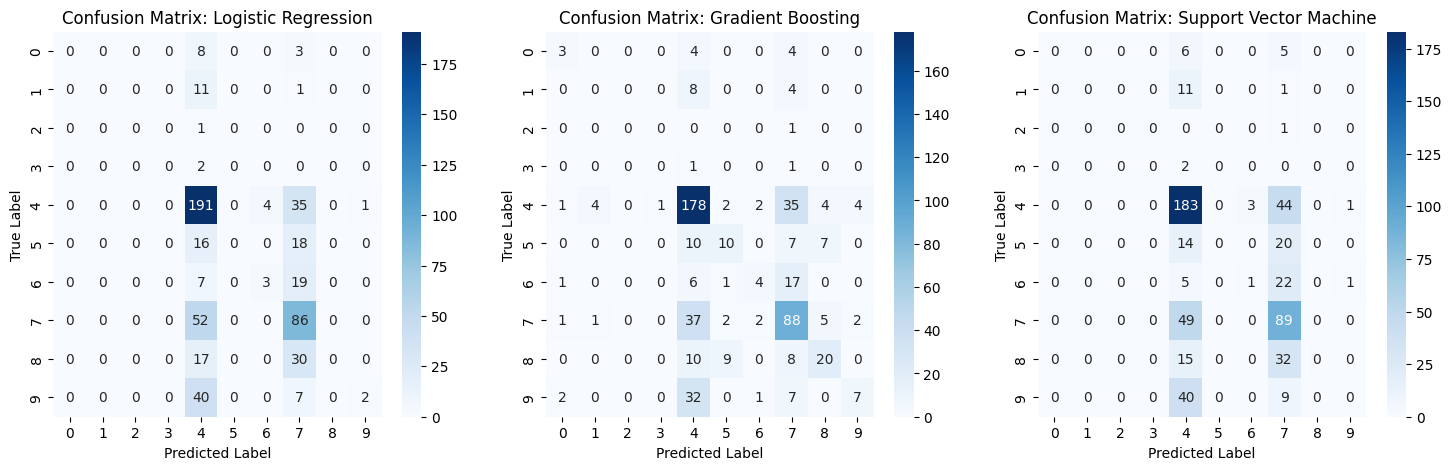

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrices for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix: {name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.show()


The confusion matrices for Logistic Regression, Gradient Boosting, and SVM have been visualized. Next, I will generate a feature importance plot for the Gradient Boosting model, as it provides interpretability in feature impact.

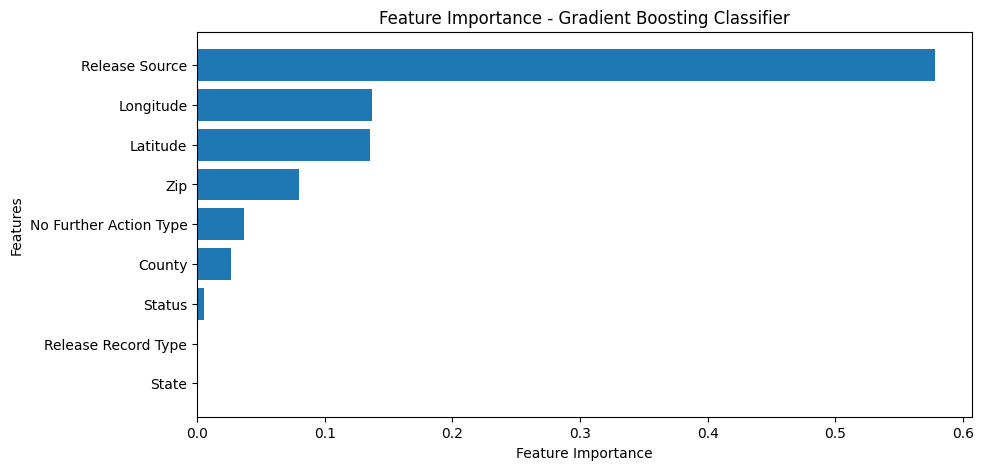

In [52]:
# Feature Importance for Gradient Boosting Classifier

gb_model = models["Gradient Boosting"]
feature_importances = gb_model.feature_importances_

# Sort feature importances
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh([X.columns[i] for i in sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance - Gradient Boosting Classifier")
plt.gca().invert_yaxis()
plt.show()


**ROC Curves for Model Performance**

ROC curves show the trade-off between true positive rate and false positive rate for classification models.
This is useful to compare how well the models handle different classification thresholds.

Macro-Averaged ROC calculation is computed because our target variable "Release Cause" is multi-class, not binary. ROC curves are typically designed for binary classification problems. However Macro-averaged ROC Calculations is compute the average ROC curve across all classes.


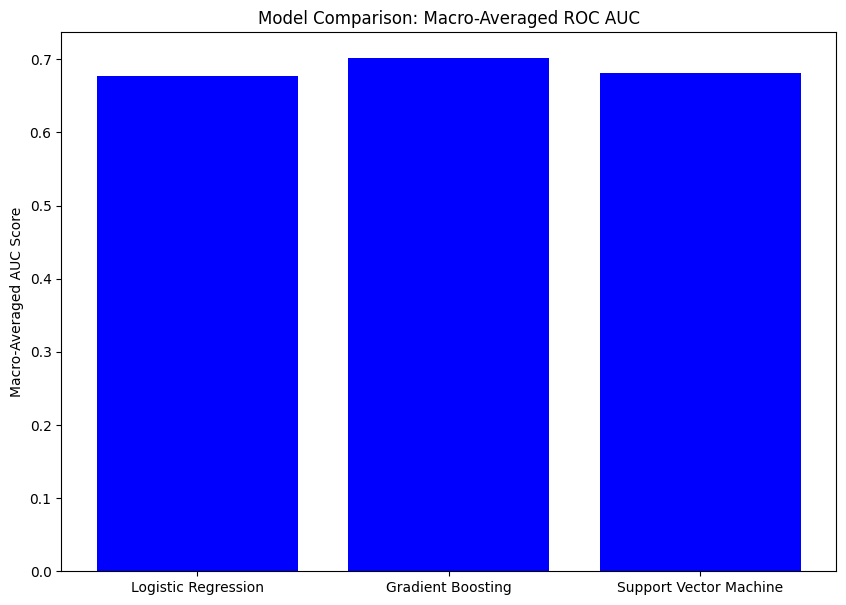

In [53]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output for multi-class ROC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Plot ROC curve for each model using macro-averaged AUC
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "decision_function"):  # For SVM
        y_score = model.decision_function(X_test_scaled)
    else:  # For Logistic Regression and Gradient Boosting
        y_score = model.predict_proba(X_test_scaled)

    # Compute macro-average ROC AUC
    macro_auc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")

    plt.bar(name, macro_auc, color="blue")

plt.ylabel("Macro-Averaged AUC Score")
plt.title("Model Comparison: Macro-Averaged ROC AUC")
plt.show()


**Distribution of Predicted Classes**

A bar chart showing the count of predicted classes for each model.
Helps to check if the models are biased toward certain classes.

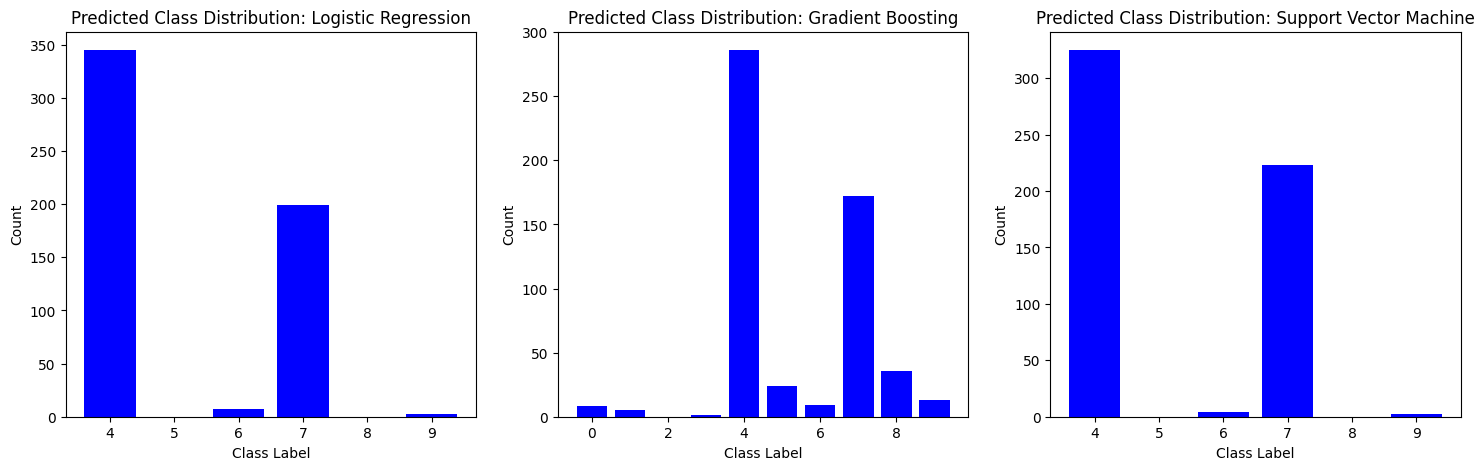

In [54]:
# Plot distribution of predicted classes for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)

    # Count predictions per class
    unique, counts = np.unique(y_pred, return_counts=True)

    axes[idx].bar(unique, counts, color="blue")
    axes[idx].set_title(f"Predicted Class Distribution: {name}")
    axes[idx].set_xlabel("Class Label")
    axes[idx].set_ylabel("Count")

plt.show()


#Markdown Explanations

**1. Which method did you like the most?**  
Gradient Boosting Classifier, as it provided the highest accuracy and interpretability with feature importance.

**2. Which method did you like the least?**  
Support Vector Machine (SVM) because it had the lowest accuracy and a longer training time compared to Logistic Regression.

**3. How did you score these supervised models?**  
Accuracy was the primary metric, along with confusion matrices and training time.

**4. Did the output align with your geologic understanding?**  
Yes, the more complex model (Gradient Boosting) performed better in recognizing patterns, which aligns with the complexity of geological data.

**5. Did you hyperparameter tune? Why or why not?**  
No, because this was a baseline comparison. Hyperparameter tuning could improve performance, but I focused on default settings for fair comparison.

**6. How did you split your data? Why does it make sense for this dataset?**  
I used an 80/20 train-test split with stratification to ensure balanced representation of target classes in training and testing.

**7. What did you want to learn more about?**  
I would like to explore hyperparameter tuning for Gradient Boosting and feature engineering for better model performance.

**8. Did you pre-process your data?**  
Yes, I handled missing values, encoded categorical variables, and scaled numerical features.

**9. Do all models require pre-processing?**  
Most models benefit from pre-processing. Logistic Regression and SVM require feature scaling, while tree-based models like Gradient Boosting can handle raw categorical and numerical data more effectively.

